<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-объявлений-о-продаже-квартир" data-toc-modified-id="Исследование-объявлений-о-продаже-квартир-1">Исследование объявлений о продаже квартир</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1.1">Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.1">Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2">Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-1.3">Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.4">Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-1.5">Общий вывод</a></span></li></ul></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import warnings
warnings.filterwarnings('ignore')#скрытие предупреждений

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head(10)) #вывод первых 10 строчек

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()# получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Ознакомившись с таблицей, можно сделать следующие выводы:

В таблице 22 столбца.

Согласно документации к данным:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении


Названия столбцов приведены к единому стилю и не требуют изменения

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.
Необходимо проверить таблицу на явные и неявные дубликаты. 
Некоторые столбцы требуют замены типа данных 

## Предобработка данных

Для подготовки данных к исследованию проведу следующие действия: 
1. Подсчет пропусков;
2. Заполнение столбцов, для которых возможно логическая замена;
3. Обработка неявных дубликатов для столбца с названиями населенных пунктов;
4. Заполенение столбцов медианными значениями с группировкой по названию населенного пункта;
5. Замена типов данных;
6. Проверка на неявные дублтикаты, удаление при необходимости.

In [4]:
df.isna().sum()# подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Сначала необходимо поработать с пропусками. Первым делом проработаю столбцы, где возможна логическая замена. 
Логично предположить, что так как часть данных вписана пользователями, значения не были заполнены в связи с отсутсвием данной характеристики. 
Это столбцы: 
* 'balcony'(число балконов) - пропуски связанны с отсутвием балконов, значит заменяю на 0
* 'is_apartment' (апартаменты (булев тип)) - апартаменты особый тип недвижимости, т.е. пропуск = "не апартаменты", значит пропуски заменяю на False. При этом этот тип данного столбеца нужно заменить на bool (в данный момент тип- object)

In [5]:
print('Число балконов. Пропуски до:', df['balcony'].isna().sum())
df['balcony'] = df['balcony'].fillna(0) # заменяю пропуски на 0
print('Число балконов. Пропуски после:', df['balcony'].isna().sum())

Число балконов. Пропуски до: 11519
Число балконов. Пропуски после: 0


In [6]:
print('Апартаменты. Пропуски до:', df['is_apartment'].isna().sum())
df['is_apartment'] = df['is_apartment'].fillna(False) # заменяю пропуски на False
print('Апартаменты. Пропуски после:', df['is_apartment'].isna().sum())

Апартаменты. Пропуски до: 20924
Апартаменты. Пропуски после: 0


Так как есть строительные стандарты для высоты потолков, можно заполнить пропуски в столбце 'ceiling_height' (высота потолков (м)) медианным значением по этому столбцу. Выборка не является однородной, поэтому корректно взять медианное значение, а не средние арифметическое. Так выбросы почти не повлияют на результат. 

In [7]:
#заполнение пропусков в столбце 'ceiling_height' медианным значением 
print('Высота потолков. Пропуски до:', df['ceiling_height'].isna().sum())
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
print('Высота потолков. Пропуски после:', df['ceiling_height'].isna().sum())

Высота потолков. Пропуски до: 9195
Высота потолков. Пропуски после: 0


Далее можно проработать пропуски для 'living_area'(жилая площадь в квадратных метрах (м²)) и 'kitchen_area'(площадь кухни в квадратных метрах (м²)). Этит пропуски можно заполнить медианными значениями с группировкой по количеству комнат. Так корректно распределятся значения для квартир-студий   

In [8]:
#заполнение пропусков в столбце 'living_area' медианным значением с группировкой по 'rooms'
print('Жилая площадь. Пропуски до:', df['living_area'].isna().sum())

for room in df['rooms'].unique():
    median = df.loc[df['rooms'] == room , 'living_area'].median()
    df.loc[(df['living_area'].isna()) & (df['rooms'] == room), 'living_area'] = median
           
print('Жилая площадь. Пропуски после:', df['living_area'].isna().sum())

Жилая площадь. Пропуски до: 1903
Жилая площадь. Пропуски после: 0


In [9]:
#заполнение пропусков в столбце 'kitchen_area' медианным значением с группировкой по 'rooms'
print('Площадь кухни. Пропуски до:', df['kitchen_area'].isna().sum())

for room in df['rooms'].unique():
    median = df.loc[df['rooms'] == room , 'kitchen_area'].median()
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == room), 'kitchen_area'] = median
           
print('Площадь кухни. Пропуски после:', df['kitchen_area'].isna().sum())

Площадь кухни. Пропуски до: 2278
Площадь кухни. Пропуски после: 197


Есть предположение, что оставшиеся пропуски связаны с отсутсвием данных в столбце 'kitchen_area' для квартир студий 'studio' и квартир со свободной планировкой 'open_plan', так как они не подразумевают отдельной кухни.
Проверю эту гипотезу и в случае подтверждения заменю эти пропуски на 0.

In [10]:
kitchen_missing = df.query('open_plan == True or studio == True') #делаю срез по квартирам студиям и свободным планировкам
print('Площадь кухни в студиях. Пропуски до:',kitchen_missing['kitchen_area'].isna().sum())
df['kitchen_area'] = df['kitchen_area'].fillna(0) # заменяю оставшиеся пропуски на 0
print('Площадь кухни. Пропуски после:', df['kitchen_area'].isna().sum())

Площадь кухни в студиях. Пропуски до: 197
Площадь кухни. Пропуски после: 0


Расстояния до аэропорта, центра, прудов и парков логично заполнить медианой с группировкой по населенному пункту. 
Для этого нужно обработать столбец 'locality_name' - убрать неявные дубликаты и пропуски.

In [11]:
df['locality_name'] = df['locality_name'].str.lower() #привожу все значения к нижнему регистру
display(df['locality_name'].unique())#вывожу список уникальных значений


array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Заметны дубликаты в написании слова посёлок(через 'е' и через 'ё'). Приведу слово к единому формату и заменю пропуски на 'unknown', чтобы все значения соответсвовали типу object и можно было дальше работать со столбцом.

In [12]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок') #убераю неявные дубликаты 
df['locality_name'] = df['locality_name'].fillna('unknown')#заменяю пропуски на unknown
#display(sorted(df['locality_name'].unique()))


In [13]:
#заполнение пропусков в столбце 'airports_nearest' медианным значением с группировкой по 'locality_name'
print('Расстояние до аэропорта. Пропуски до:', df['airports_nearest'].isna().sum())

for local in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == local , 'airports_nearest'].median()
    df.loc[(df['airports_nearest'].isna()) & (df['locality_name'] == local), 'airports_nearest'] = median
           
print('Расстояние до аэропорта. Пропуски после:', df['airports_nearest'].isna().sum())

Расстояние до аэропорта. Пропуски до: 5542
Расстояние до аэропорта. Пропуски после: 4864


In [14]:
#заполнение пропусков в столбце 'cityCenters_nearest' медианным значением с группировкой по 'locality_name'
print('Расстояние до центра города. Пропуски до:', df['cityCenters_nearest'].isna().sum())

for local in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == local , 'cityCenters_nearest'].median()
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == local), 'cityCenters_nearest'] = median
           
print('Расстояние до центра города. Пропуски после:', df['cityCenters_nearest'].isna().sum())

Расстояние до центра города. Пропуски до: 5519
Расстояние до центра города. Пропуски после: 4864


In [15]:
#заполнение пропусков в столбце 'parks_nearest' медианным значением с группировкой по 'locality_name'
print('Расстояние до ближайшего парка. Пропуски до:', df['parks_nearest'].isna().sum())

for local in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == local , 'parks_nearest'].median()
    df.loc[(df['parks_nearest'].isna()) & (df['locality_name'] == local), 'parks_nearest'] = median
           
print('расстояние до ближайшего парка. Пропуски после:', df['parks_nearest'].isna().sum())

Расстояние до ближайшего парка. Пропуски до: 15620
расстояние до ближайшего парка. Пропуски после: 5998


In [16]:
#заполнение пропусков в столбце 'ponds_nearest' медианным значением с группировкой по 'locality_name'
print('Расстояние до ближайшего водоёма. Пропуски до:', df['ponds_nearest'].isna().sum())

for local in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == local , 'ponds_nearest'].median()
    df.loc[(df['ponds_nearest'].isna()) & (df['locality_name'] == local), 'ponds_nearest'] = median
           
print('Расстояние до ближайшего водоёма. Пропуски после:', df['ponds_nearest'].isna().sum())

Расстояние до ближайшего водоёма. Пропуски до: 14589
Расстояние до ближайшего водоёма. Пропуски после: 4972


In [17]:
#заполнение пропусков в столбце 'floors_total' медианным значением с группировкой по 'locality_name'
print('Всего этажей в доме. Пропуски до:', df['floors_total'].isna().sum())

for local in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == local , 'floors_total'].median()
    df.loc[(df['floors_total'].isna()) & (df['locality_name'] == local), 'floors_total'] = median
           
print('Всего этажей в доме. Пропуски после:', df['floors_total'].isna().sum())

Всего этажей в доме. Пропуски до: 86
Всего этажей в доме. Пропуски после: 0


In [18]:
df.isna().sum() #посмотрю на оставшиеся пропуски

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4864
cityCenters_nearest     4864
parks_around3000        5518
parks_nearest           5998
ponds_around3000        5518
ponds_nearest           4972
days_exposition         3181
dtype: int64

Есть предположение, что оставшиеся пропуски в расстояниях связаны с тем, что населенные пункты не относятся территориально к Санкт-Петербургу (относятся к Ленобласти) и по ним автоматически не были  заполнены картографические данные,  например расстояние до аэропорта, до центра города и тд (т.е. ошибка при выгрузке). Если гипотиза подтвердится, то заполню пропуски медианами по всему набору данных.Это будет допустимо, так как для дальнейшего анализа нам понадобится только данные по Санкт-Петербургу. 

In [19]:
#беру срез данных с пропущенными значениями и смотрю на уникальные значения населенных пунктов.
display(sorted(df[~((df['airports_nearest']>=0) | (df['cityCenters_nearest']>=0))]['locality_name'].unique()))

# Их нет, могу заполнить медианами

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской посёлок большая ижора',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'деревня

In [20]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())
df['parks_nearest'] = df['parks_nearest'].fillna(df['parks_nearest'].median())
df['parks_around3000'] = df['parks_around3000'].fillna(df['parks_around3000'].median())
df['ponds_nearest'] = df['ponds_nearest'].fillna(df['ponds_nearest'].median())
df['ponds_around3000'] = df['ponds_around3000'].fillna(df['ponds_around3000'].median())
df.isna().sum() #посмотрю на оставшиеся пропуски

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

Пропуски в 'days_exposition' оставлю без обработки, так как этот столбец понадобится для анализа и заполнение медианой можент исказить результат. Так как в этом столбце остаются пустые значения- изменить тип данных столбца на int не получится.

Типы данных в некоторых столбцах необходимо заменить

In [21]:
df['floors_total'] = df['floors_total'].astype(int)
df['last_price'] = df['last_price'].astype(int)

df['balcony'] = df['balcony'].astype(int)
df['is_apartment'] = df['is_apartment'].astype(bool) #меняю тип данных на булев тип
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [22]:
# подсчёт явных дубликатов
print (df.duplicated().sum())

0


**Вывод**

Была проведена предобработка данных таблицы. Заполнены пропуски, изменены типы данных. Обработаны неявные дубликаты, явных дубликатов в таблице нет.

## Расчёты и добавление результатов в таблицу

Для дальнейших расчетов добавлю в таблицу:
    - цену квадратного метра
    - день недели, месяц и год публикации
    - этаж квартиры (первый, последний, другой)
    - соотношение жилой и общей площади
    - отношение площади кухни к общей площади


In [23]:
df['sq_meter_price'] = df['last_price'] / df['total_area']
df['sq_meter_price'] = df['sq_meter_price'].astype(int) # заменю тип на целочисленный, точность до копеек излишня

In [24]:
df['weekday'] = df['first_day_exposition'].dt.weekday #день недели 0-понедельник..6-воскресенье
df['month'] = df['first_day_exposition'].dt.month #месяц публикации
df['year'] = df['first_day_exposition'].dt.year #год публикации


In [25]:
#напишу функцию для распределения этажа квартиры по категориям 'первый','последний', 'другой'.
def floor_category(row):
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'
df['floor_category'] = df.apply(floor_category, axis = 1) 

In [26]:
#отношение жилой к общей площади
df['living_area_ratio'] = df['living_area'] / df['total_area']
    
#отношение площади кухни к общей площади
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [27]:
df.info() #проверяю, добавились ли столбцы


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Необходимые столбцы добавлены.

## Исследовательский анализ данных

Выполню следующие действия.
1. Изучение особенностей основных параметра (площадь, цена, число комнат, высота потолков) с помощью гистограмм, диаграмм размаха, числового описания данных. Определение границ интервала наиболее вероятных значений.

2. Изучение времени продажи квартиры. Построение гистограммы. Расчет среднего и медианы. Определение обычной, быстрой и долгой  скорости продажи.

3. Избавление от редких и выбивающихся значений.

4.  Изучение зависимости цены квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра. Проверка зависимости от даты размещения: дня недели, месяца и года.

5. Отбор 10 населённых пунктов с наибольшим числом объявлений. Выделение из них пунктов с самой высокой и низкой стоимостью жилья.

6. Выделение квартир в центер Санкт-Петербурга.

7. Для квартир в центре Санкт-Петербурга изучение следующих параметров: площадь, цена, число комнат, высота потолков. Выделение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 


Для продолжения анализа необходимо изучить основные параметры: площадь, цена, число комнат, высота потолков. Чтобы визуально оценить как часто в наборе данных встречается то или иное значение - построю гистограмму для каждого параметра. Для визуальной оценки разброса значений построю диаграмму размаха и оценю числовые характеристики с помощью метода describe(). Этот метод позволяет оценить сразу все важные числовые характеристики, такие как минимальное, максимальное значения, среднее арифметическое, медианну, стандартное отклонение (показывает, насколько значения в выборке отличаются от среднего арифметического).
Для каждого парметра также просчитаю границы интервала наиболее вероятных значений. Это понадобится для исключения выбросов из анализа.



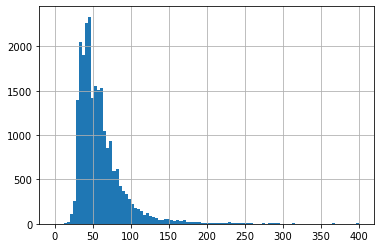

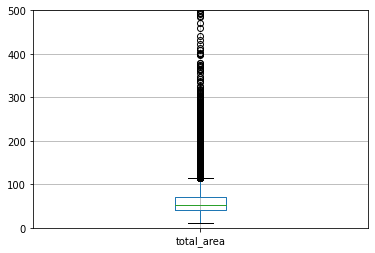

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [28]:
df['total_area'].hist(bins=100, range=(0, 400)) #строю гистограмму
plt.show()
df.boxplot(column='total_area') #строю диаграмма размаха
plt.ylim(0, 500)
plt.show()

df['total_area'].describe() #Посмотрю на числовое описание данных


In [29]:
q1 = df['total_area'].quantile(0.25)
q3 = df['total_area'].quantile(0.75)
iqr = q3 - q1 # iqr
print('Границы интервала наиболее вероятных значений:', q1 - 1.5 * iqr, q3 + 1.5 * iqr)

Границы интервала наиболее вероятных значений: -4.8500000000000085 114.75000000000001


Наверняка есть квартиры с площадью больше 114.75 метров, возьму верхнюю границу в 400 метров.

Чтобы избежать экспоненциальной записи, для столбца 'last_price' вместо вызова метода describe(), просчитаю числовые характеристики вручную.

Цена на момент снятия с публикации
Минимальное значение: 12190
Максимальное значение: 763000000
Среднее арифметическое: 6541548
Медианное значение: 4650000


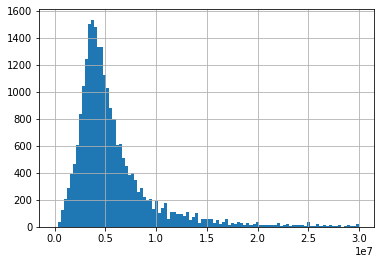

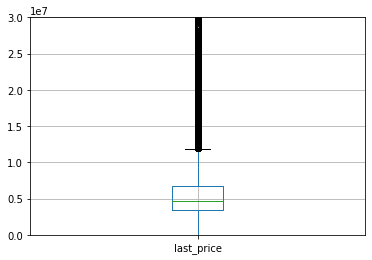

Границы интервала наиболее вероятных значений: -1700000.0 11900000.0


In [30]:

print('Цена на момент снятия с публикации') 
print('Минимальное значение:', df['last_price'].min())
print('Максимальное значение:', df['last_price'].max())
print('Среднее арифметическое:', df['last_price'].mean().astype(int)) 
print('Медианное значение:', df['last_price'].median().astype(int)) 
df['last_price'].hist(bins=100, range=(0, 30000000)) 
plt.show()
df.boxplot(column='last_price') #строю диаграмма размаха
plt.ylim(0, 30000000)
plt.show()


q1 = df['last_price'].quantile(0.25)
q3 = df['last_price'].quantile(0.75)
iqr = q3 - q1 # iqr
print('Границы интервала наиболее вероятных значений:', q1 - 1.5 * iqr, q3 + 1.5 * iqr)

In [31]:
df['last_price'].describe() 
pd.options.display.float_format = '{:,.1f}'.format


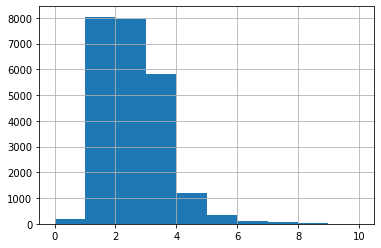

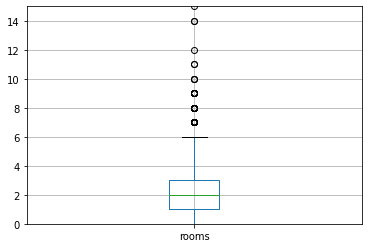

count   23,699.0
mean         2.1
std          1.1
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

In [32]:
df['rooms'].hist(bins=10, range=(0, 10)) 
plt.show()
df.boxplot(column= 'rooms') #строю диаграмма размаха
plt.ylim(0, 15)
plt.show()
df['rooms'].describe()

Для столбца 'rooms' нет необходимости расчитывать интервалы наиболее вероятных значений, так как по графику хорошо видно окончание верхнего "уса" соответсвует 6. Однако, встречаются квартиры и с большим числом комнат. Задам верхнюю границу в 15 комнат.

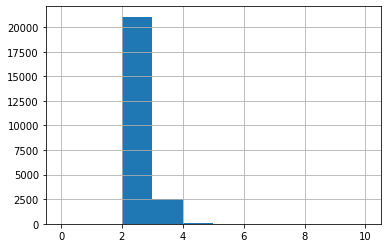

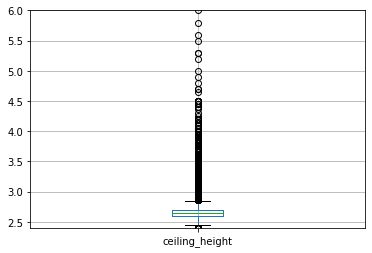

count   23,699.0
mean         2.7
std          1.0
min          1.0
25%          2.6
50%          2.6
75%          2.7
max        100.0
Name: ceiling_height, dtype: float64

In [33]:

df['ceiling_height'].hist(bins=10, range=(0, 10)) 
plt.show()


df.boxplot(column= 'ceiling_height') #строю диаграмму размаха
plt.ylim(2.4, 6)
plt.show()
df['ceiling_height'].describe()


In [34]:
q1 = df['ceiling_height'].quantile(0.25)
q3 = df['ceiling_height'].quantile(0.75)
iqr = q3 - q1 # iqr
print('Границы интервала наиболее вероятных значений:', q1 - 1.5 * iqr, q3 + 1.5 * iqr)

Границы интервала наиболее вероятных значений: 2.45 2.8500000000000005


Однако, в центре Санкт-Петербурга среди квартир в старом фонде наверняка найдутся квартиры с высотой потолка больше 2.85м. Поэтому ограничу максимальное значение до 5 метров.

Изучу время продажи квартиры. 

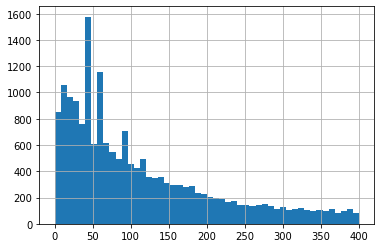

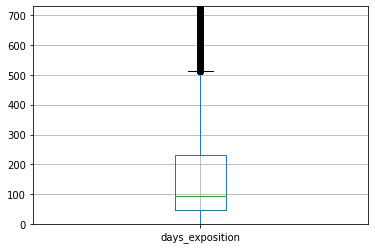

count   20,518.0
mean       180.9
std        219.7
min          1.0
25%         45.0
50%         95.0
75%        232.0
max      1,580.0
Name: days_exposition, dtype: float64

In [35]:

df['days_exposition'].hist(bins=50, range = (0,400))#строю гистограмму
plt.show()

df.boxplot(column= 'days_exposition') #строю диаграмма размаха
plt.ylim(0, 730) #ограничиваю количество дней двумя годами
plt.show()
df['days_exposition'].describe()

In [36]:
q1 = df['days_exposition'].quantile(0.25)
q3 = df['days_exposition'].quantile(0.75)
iqr = q3 - q1 # iqr
print('Границы интервала наиболее вероятных значений:', q1 - 1.5 * iqr, q3 + 1.5 * iqr)

Границы интервала наиболее вероятных значений: -235.5 512.5


Среднее значение для времени продажи квартиры - 181 день, медианное значение - 95 дней. Среднее значение в два раза привышает медианное - это связанно с неоднородностью значений. О наличии сильного разброса говорит и высокий показатель стандартного отклонения. Чем ближе стандартное отклонение к 0, тем надежнее среднее. Для нашей выборки стандартное отклонение близится к 220, т.е. на среднее при анализе полагаться нельзя. 
По диаграмме размаха видно, где сосредоточено больше всего наблюдений ("внутри ящика").
Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 510 дней — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений. Поэтому можно сделать вывод, что большинство продаж совершается в промежуток от 45 до 232 дней. Медианный показатель времени продажи -95 дней. Продажа до 45 дней - быстрая продажа, но не аномально. Продажа от 232 до 512 - долгая продажа. Продажа дольше 512 дней - уже аномально долго, такие данные я отброшу и не буду включать в анализ.


**Вывод**

Были проанализированны основные параметры: площадь, цена, число комнат, высота потолков, время продажи квартиры. Определены интервалы наиболее вероятных значений, за пределами которых начинаются выбросы. Ислключу из данных все выбросы и продолжу изучение взаимосвязей уже без аномально редких значений. Для этого сделаю срез методом query().

In [37]:
df_selected = df.query(
    'total_area <= 400\
    and last_price <= 11900000.0\
    and rooms <= 15\
    and 2.45 <= ceiling_height <= 5\
    and days_exposition <= 512.5')
#оценю долю оставшихся данных от общего числа данных
print(len(df_selected)/ len(df)) 
#После исключения редких и выбивающихся значений осталось 74% всех данных. 
#Данные изначальной таблицы дальше не понадобятся, поэтому перезапишу 'df_selected' как 'df'
df = df_selected


0.7400734208194438


Далее необходимо определить, какие факторы влияют больше всего на стоимость квартиры. Изучу линейные зависимости между параметрами с помощью корреляции и нелинейные с помощью графиков. Для каждого параметра рассчитаю коэффициент корреляции Пирсона.Чем он ближе к крайним значениям 1 или -1, тем теснее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе. Графики помогут найти более сложный характер взаимосвязи. Для категориальных столбцов буду изпользовать диаграмму размаха, для колличественных - диаграммы рассеяния и линейные графики.
Буду рассматривать зависимость цены квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра.
Также проверю зависимость от даты размещения: дня недели, месяца и года. 

Зависимость цены квадратного метра от числа комнат
Коэффициент корреляции Пирсона: -0.2375727872708477


(1.0, 175000.0)

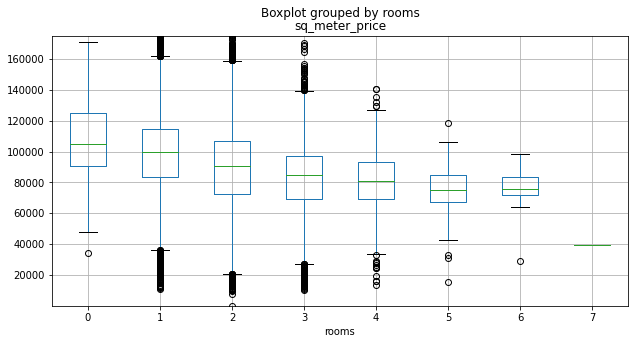

In [38]:
#Проверю зависимость цены квадратного метра от числа комнат
print('Зависимость цены квадратного метра от числа комнат')
print('Коэффициент корреляции Пирсона:', df['sq_meter_price'].corr(df['rooms']))
df.boxplot(column = 'sq_meter_price', by = 'rooms', figsize=(10, 5))
plt.ylim(1, 175000)

Коэффициент корреляции Пирсона: -0.23 говорит о наличии невысокой обратной линейной взаимосвязи. График подтверждает обратную взаимосвязь - чем меньше комнат, тем выше стоимость квадратного метра. Самая высокая стоимость у квартир студий и квартир со свободной планировкой (они отображаются на графике как 0). К ним близки по средней стоимости однокомнатные квартиры. Далее идет снижение стоимости квадратного метра, при этом медианная цена для квартир с 3 и более комнатами изменяется незначительно. Так как квартиры студии и однокомнатные квартиры обычно имеют меньшую общую площадь, можео сделать вывод, что стоимость квадратного метра зависит не только от количества комнат, но и от общей площади. Чем меньше площадь, тем выше стоимость квадратного метра.

Зависимость цены квадратного метра от этажа
Коэффициент корреляции Пирсона: 0.24797889342184237


(1.0, 175000.0)

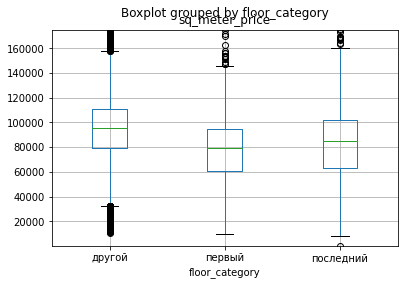

In [39]:
#Проверю зависимость цены квадратного метра от этажа
print('Зависимость цены квадратного метра от этажа')
#посчитаю корреляцию по изначальному столбцу 'floor', так как 'floor_category' имеет тип object
print('Коэффициент корреляции Пирсона:', df['sq_meter_price'].corr(df['floor']))  
df.boxplot(column = 'sq_meter_price', by = 'floor_category')
plt.ylim(1, 175000)

По графику видно, что у квартир на первом этаже самая низкая стоимость квадратного метра, основаня масса квартир на первом этаже продается по стоимости между 60000руб. и 95000руб. за метр, незначительно дороже квартиры на последнем этаже. Квартиры не первого и не последнего этажа дороже: основная масса продается по стоимости около 80000руб. до 110000руб. за метр, медианное значение стоимости квадратного метра для таких кварир стремится к 100000руб./метр. Можно сделать вывод: что стоимость квадртаного метра зависит от категории этажа.

Зависимость цены квадратного метра от удаленности от центра
Коэффициент корреляции Пирсона: -0.22036076866206872


<AxesSubplot:xlabel='cityCenters_nearest', ylabel='sq_meter_price'>

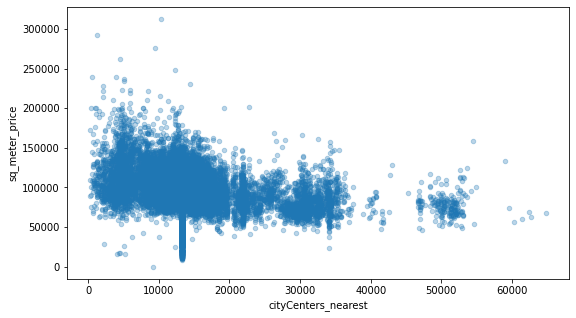

In [40]:
#Проверю зависимость цены квадратного метра от удаленности от центра
print('Зависимость цены квадратного метра от удаленности от центра')
print('Коэффициент корреляции Пирсона:', df['sq_meter_price'].corr(df['cityCenters_nearest']))
df.plot(x='cityCenters_nearest', y='sq_meter_price', kind='scatter', alpha=0.3, figsize=(9, 5)) 



Видна обратная зависимость цены от удаленности от центра. Чем ближе к центру - тем дороже стоимость квадратного метра. Яркие линии значений связаны с тем, что в изначальных данных были пропуски в 'cityCenters_nearest', которые были заполнены медианной с группировкой по населенному пункту.

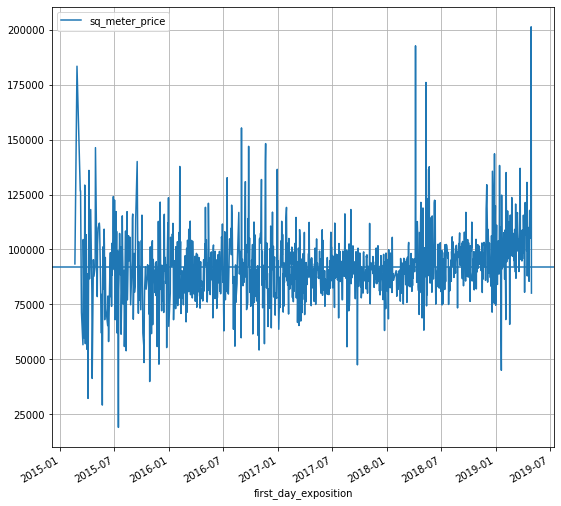

In [41]:
#Далее изучу зависимость цены квадратного метра от даты размещения
first_day_exposition_stat = df.pivot_table(index='first_day_exposition', values='sq_meter_price')
first_day_exposition_stat.plot(y='sq_meter_price', grid = True, figsize=(9, 9))
plt.axhline(df['sq_meter_price'].median()) #проведу медиану на графике для наглядности


По графику можно оценить изменение цены квадратного метра с начала 2015 года. Заметен рост стоимости квадратного метра начиная с 2018года и резкий скачек вверх с начала 2019 года. Можно сделать вывод о тенденции к повышению стоимости жилья на рынке недвижимости. Далее оценю зависимость от даты размещения более конкретно - зависимость от  дня недели, месяца и года.

Зависимость цены квадратного метра от дня недели
Коэффициент корреляции Пирсона: -0.004658423199713163


<AxesSubplot:xlabel='weekday'>

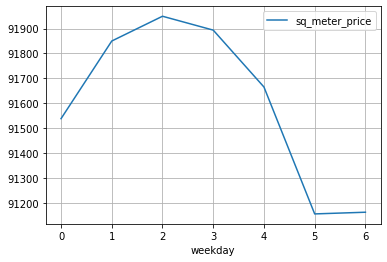

In [42]:
#Проверю зависимость цены квадратного метра от дня недели. 0-понедельник .. 6- воскресенье
print('Зависимость цены квадратного метра от дня недели')
print('Коэффициент корреляции Пирсона:', df['sq_meter_price'].corr(df['weekday']))
weekday_stat = df.pivot_table(index='weekday', values='sq_meter_price')
weekday_stat.plot(y='sq_meter_price', grid = True)


На графике видны коллебания - увеличение цены к середине недели и небольшой спад к выходным. Это обусловленно изменением деловой активности в течение недели. Но так как цена меняется порядка 1000 руб. - значимыми эти изменения не назвать (что видно и по коэффиценту корреляции).

Зависимость цены квадратного метра от месяца
Коэффициент корреляции Пирсона: 0.00605715477353275


<AxesSubplot:xlabel='month'>

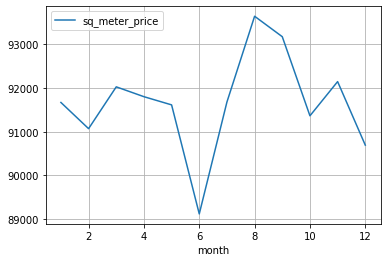

In [43]:
#Проверю зависимость цены квадратного метра от месяца.
print('Зависимость цены квадратного метра от месяца')
print('Коэффициент корреляции Пирсона:', df['sq_meter_price'].corr(df['month']))
month_stat = df.pivot_table(index='month', values='sq_meter_price')
month_stat.plot(y='sq_meter_price', grid = True)



По графику видна зависимость цены квадратного метра от месяца, которая связана с сезонными колебаниями. Спад после Нового года,небольшой рост в марте, явный спад к началу лета и стремительный рост к началу учебного года. Пик приходится на август - время когда увеличивается деловая активность, студенты приезжат из других городов и тд. (т.е. возрастает спрос).

Зависимость цены квадратного метра от года
Коэффициент корреляции Пирсона: 0.08213082757981456


<AxesSubplot:xlabel='year'>

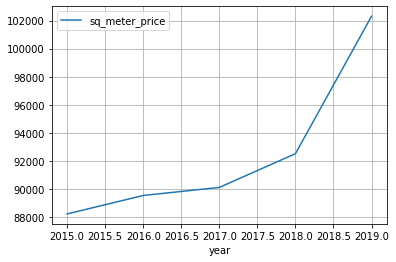

In [44]:
#Проверю зависимость цены квадратного метра от года.
print('Зависимость цены квадратного метра от года')
print('Коэффициент корреляции Пирсона:', df['sq_meter_price'].corr(df['year']))
year_stat = df.pivot_table(index='year', values='sq_meter_price')
year_stat.plot(y='sq_meter_price', grid = True)



На графике виден плавный рост стоимости квадратного метра с 2015 года и резкий скачок вверх с 2018. Видна тенденция к повышению стоимости жилья на рынке недвижимости.

**Вывод**

Изучив зависимость стоимости квадратного метраразна от различных параметров, можно сделать вывод что влияние на цену оказывают множественные факторы. Чем меньше квартира- тем выше цена квадратного метра. Квартиры, находящиеся на первом и последнем этажах, уступают по стоимости остальным. Чем ближе к центру - тем больше стоимость. Кроме того, на цену влиют факторы времени. Цена квадратного метра подвержена сезонным колебаниям спроса. При этом, сильной зависимости от дня недели не прослеживается. При изучении данных по годам был обнаружен резкий рост стоимости жилья начиная с 2018 года. 

Выберу 10 населённых пунктов с наибольшим числом объявлений. Посчитаю среднюю цену квадратного метра в этих населённых пунктах. Выделию населённые пункты с самой высокой и низкой стоимостью жилья. 

In [45]:
#Отбираю 10 населённых пунктов с наибольшим числом объявлений
locality_top = df.groupby('locality_name').agg({'sq_meter_price': ['mean', 'count']})
locality_top.columns = ['средняя цена кв.м', 'кол-во объявлений']
locality_top = locality_top.sort_values(by = 'кол-во объявлений', ascending = False).astype(int).head(10)
display(locality_top)    

,средняя цена кв.м,кол-во объявлений
locality_name,,
санкт-петербург,104309,11249
посёлок мурино,85947,517
посёлок шушары,77914,388
всеволожск,66742,307
колпино,74487,291
посёлок парголово,89162,288
деревня кудрово,92599,267
пушкин,99241,259
гатчина,67985,242


In [46]:
#Выделяю населенные пункты с самой высокой и самой низкой ценой за квадратный метр   
display('Самая высокая стоимость жилья:', locality_top.astype(int).head(1))
display('Самая низкая стоимость жилья:', locality_top.astype(int).tail(1))

'Самая высокая стоимость жилья:'

,средняя цена кв.м,кол-во объявлений
locality_name,,
санкт-петербург,104309,11249


'Самая низкая стоимость жилья:'

,средняя цена кв.м,кол-во объявлений
locality_name,,
выборг,57117,191


**Вывод**

Были определены 10 населённых пунктов с наибольшим числом объявлений. Самая высокая стоимость жилья в пределах Санкт-Петербурга (средняя цена  103663 руб./м.), самая низкая в г.Выборг (средняя цена 56856 руб./м.)

Изучу предложения квартир: выделю квартиры в Санкт-Петербурге и выясню, какая область входит в центр.

<AxesSubplot:xlabel='km_to_center'>

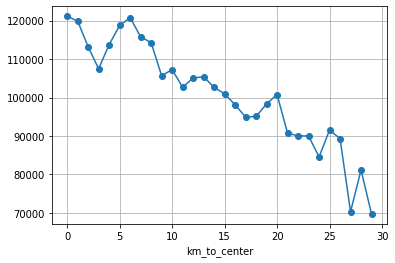

In [47]:
#Отбираю Санкт-Петербург 
spb_flats = df.query('locality_name == "санкт-петербург"')
#Создаю столбец с километрами, округляем до целых значений
spb_flats['km_to_center'] = (spb_flats['cityCenters_nearest'] / 1000).round()

#Группирую данные по средней цене квадратного метра и строим график
spb_flats_grouped = spb_flats.groupby('km_to_center')['sq_meter_price'].mean().astype(int)
spb_flats_grouped.plot(x='km_to_cente', y='sq_meter_price', style='o-', grid = True)


**Вывод**

По графику видно, что после расстояния приблизительно в 8 км начинается спад. Поэтому расстояние в 8 км можно определить границей центральной зоны.

Проанализирую территорию центра и изучу следующие параметры: площадь, цена, число комнат, высота потолков. Также выделю факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сравню полученные выводы с общими выводами по всему город

In [48]:
#Отберу все значения 
centre = spb_flats.query('km_to_center <= 8')
#изучиу следующие параметры: площадь, цена, число комнат, высота потолков


Центр. Площадь


count   2,138.0
mean       64.1
std        23.3
min        12.0
25%        46.0
50%        61.0
75%        78.7
max       190.0
Name: total_area, dtype: float64

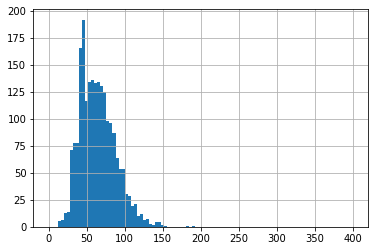

In [49]:
print('Центр. Площадь')
centre['total_area'].hist(bins=100, range=(0, 400)) #строю гистограмму
centre['total_area'].describe() #Посмотрю на числовое описание данных

Основная масса объектов в центре имеет площадь от 46 до 78 м. Среднее значение площади - 61 м. Результаты практически не отличаются от общих по городу.

Центр. Цена на момент снятия с публикации
Минимальное значение: 1600000
Максимальное значение: 11900000
Среднее арифметическое: 7098519
Медианное значение: 6910954


<AxesSubplot:>

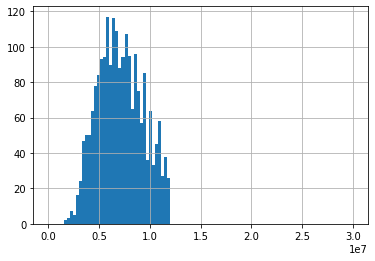

In [50]:
print('Центр. Цена на момент снятия с публикации') 
print('Минимальное значение:', centre['last_price'].min())
print('Максимальное значение:', centre['last_price'].max())
print('Среднее арифметическое:', centre['last_price'].mean().astype(int)) 
print('Медианное значение:', centre['last_price'].median().astype(int)) 
centre['last_price'].hist(bins=100, range=(0, 30000000)) 



Средняя  и медианная цена квадратного метра в центре выше чем в общем по городу. 

Центр. Колличество комнат


count   2,138.0
mean        2.3
std         1.0
min         0.0
25%         2.0
50%         2.0
75%         3.0
max         6.0
Name: rooms, dtype: float64

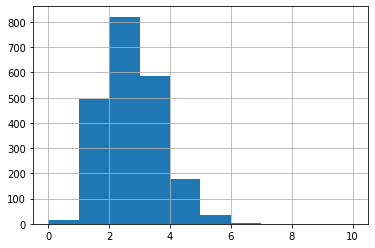

In [51]:
print('Центр. Колличество комнат')
centre['rooms'].hist(bins=10, range=(0, 10)) 
centre['rooms'].describe()

В среднем количество комнат в квартирах в центре - 2. Как и в общем по городу.

Центр. Высота потолков


count   2,138.0
mean        2.8
std         0.3
min         2.5
25%         2.6
50%         2.6
75%         3.0
max         4.4
Name: ceiling_height, dtype: float64

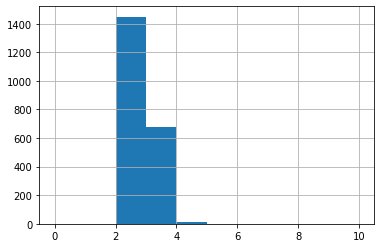

In [52]:
print('Центр. Высота потолков')
centre['ceiling_height'].hist(bins=10, range=(0, 10)) 
centre['ceiling_height'].describe()

Средняя высота потолка в центре - 2.65. Как и в общем по городу.

Центр. Зависимость цены квадратного метра от числа комнат
Коэффициент корреляции Пирсона: -0.5255098364231743


(0.0, 175000.0)

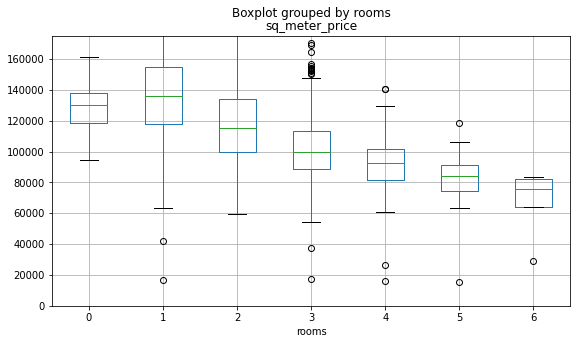

In [53]:
#Проверю зависимость цены квадратного метра от числа комнат
print('Центр. Зависимость цены квадратного метра от числа комнат')
print('Коэффициент корреляции Пирсона:', centre['sq_meter_price'].corr(centre['rooms']))
centre.boxplot(column = 'sq_meter_price', by = 'rooms', figsize=(9, 5))
plt.ylim(0, 175000)

Самая высокая цена за квадратный метр наблюдается у однокомнатных квартир. Средняя стоимость квадратного метра студий чуть ниже. С увеличением колличества квартир снижается стоимость метра. Как и в общем по городу.

Центр. Зависимость цены квадратного метра от этажа
Коэффициент корреляции Пирсона: 0.26245331962346063


(0.0, 175000.0)

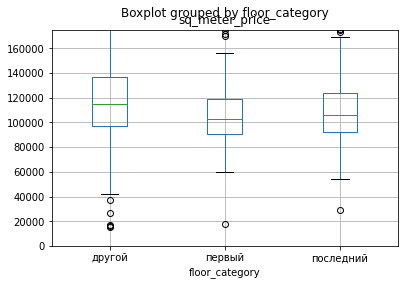

In [54]:
#Проверю зависимость цены квадратного метра от этажа
print('Центр. Зависимость цены квадратного метра от этажа')
#посчитаю корреляцию по столбцу 'floor', так как 'floor_category' имеет тип object
print('Коэффициент корреляции Пирсона:', centre['sq_meter_price'].corr(centre['floor']))  
centre.boxplot(column = 'sq_meter_price', by = 'floor_category')
plt.ylim(0, 175000)

Как и во всем городе квартиры непервого и непоследнего этажей - дороже. Квартиры на первом этаже дешевле всего. Как и в общем по городу.

Центр. Зависимость цены квадратного метра от удаленности от центра
Коэффициент корреляции Пирсона: 0.029571856097804255


<AxesSubplot:xlabel='cityCenters_nearest', ylabel='sq_meter_price'>

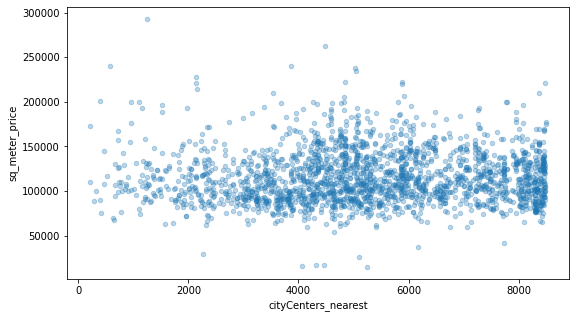

In [55]:
#Проверю зависимость цены квадратного метра от удаленности от центра
print('Центр. Зависимость цены квадратного метра от удаленности от центра')
print('Коэффициент корреляции Пирсона:', centre['sq_meter_price'].corr(centre['cityCenters_nearest']))
centre.plot(x='cityCenters_nearest', y='sq_meter_price', kind='scatter', alpha=0.3, figsize=(9, 5)) 



Стоимость квадратного метра по всему центру распределена равномерно, в отличии от квартир по городу.

Центр. Зависимость цены квадратного метра от даты размещения


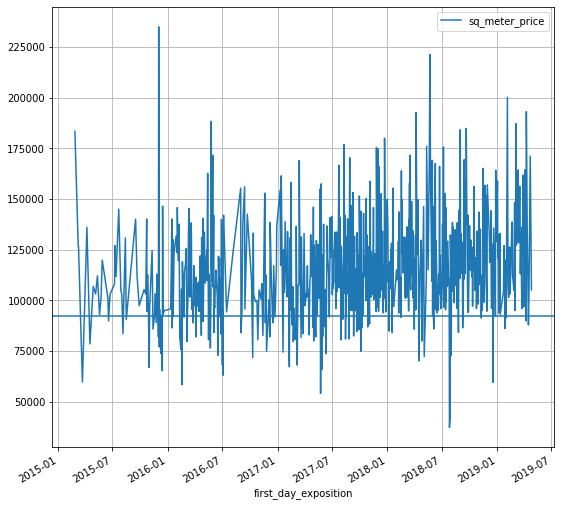

In [56]:
#Далее изучу зависимость цены квадратного метра от даты размещения
print('Центр. Зависимость цены квадратного метра от даты размещения')
centre_first_day_exposition_stat = centre.pivot_table(index='first_day_exposition', values='sq_meter_price')
centre_first_day_exposition_stat.plot(y='sq_meter_price', grid = True, figsize=(9, 9))
plt.axhline(df['sq_meter_price'].median()) #проведу медиану на графике для наглядности


По графику хорошо прослеживается, что среднняя стоимость квадратного метра в центре выше медианного значения по городу на протяжении всего времени исследования. Рост стоимости более плавный.

Зависимость цены квадратного метра от дня недели
Коэффициент корреляции Пирсона: 0.02751569150455182


<AxesSubplot:xlabel='weekday'>

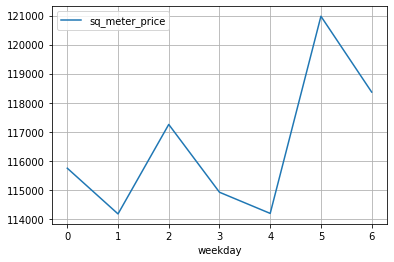

In [57]:
#Проверю зависимость цены квадратного метра от дня недели. 0-понедельник .. 6- воскресенье
print('Зависимость цены квадратного метра от дня недели')
print('Коэффициент корреляции Пирсона:', centre['sq_meter_price'].corr(centre['weekday']))
centre_weekday_stat = centre.pivot_table(index='weekday', values='sq_meter_price')
centre_weekday_stat.plot(y='sq_meter_price', grid = True)



Цена квадратного метра по выходным для квартир в центре выше.

Центр. Зависимость цены квадратного метра от месяца
Коэффициент корреляции Пирсона: -0.02794937716861345


<AxesSubplot:xlabel='month'>

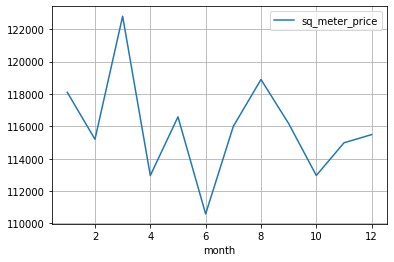

In [58]:
#Проверю зависимость цены квадратного метра от месяца.
print('Центр. Зависимость цены квадратного метра от месяца')
print('Коэффициент корреляции Пирсона:', centre['sq_meter_price'].corr(centre['month']))
centre_month_stat = centre.pivot_table(index='month', values='sq_meter_price')
centre_month_stat.plot(y='sq_meter_price', grid = True)


Цены на квартиры в центре также как и в остальном городе, подтвержены сезонным колебаниям, однако рост перед началом учебного года менее резкий. Но наблюдается скачок цен в марте.

Центр.Зависимость цены квадратного метра от года
Коэффициент корреляции Пирсона: 0.13941880526826764


<AxesSubplot:xlabel='year'>

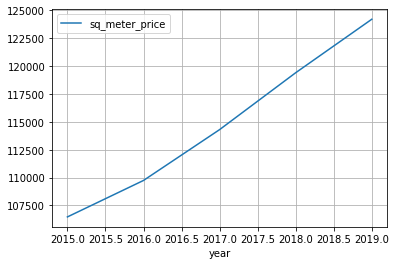

In [59]:
#Проверю зависимость цены квадратного метра от года.
print('Центр.Зависимость цены квадратного метра от года')
print('Коэффициент корреляции Пирсона:', centre['sq_meter_price'].corr(centre['year']))
centre_year_stat = centre.pivot_table(index='year', values='sq_meter_price')
centre_year_stat.plot(y='sq_meter_price', grid = True)


График показывает, что рост стоимости квадратного метра в центре более плавный. Резкого скачка в 2018 году нет, можно сделать вывод, что стоимость квадратного метра по городу подтягиваются к ценам в центре.

## Общий вывод

Данное исследование было подготовлено целью определения параметров рыночной стоимости объектов недвижимости.Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

Для общей массы квартир Санкт-Петербурга изучены следующие параметры: площадь, цена, число комнат, высота потолков, зависимость стоимости квадратного метрара от различных параметров. По полученным данным можно сделать следующие выводы:

1. Чем меньше квартира- тем выше цена квадратного метра. 

2. Квартиры, находящиеся на первом и последнем этажах, уступают по стоимости остальным. 

3. Чем квартра ближе к центру - тем выше стоимость. 

4. На цену влиют факторы времени. Цена квадратного метра подвержена сезонным колебаниям спроса. При этом, сильной зависимости от дня недели не прослеживается. При изучении данных по годам был обнаружен резкий рост стоимости жилья начиная с 2018 года. 


Были выделены квартиры в центре Санкт-Петербурга и изучены схожие параметры для этой группы. Сделаны следующие выводы:

1. Такие параметры, как площадь, число комнат, высота потолков практически не отличается от общих по городу. Однако цена объектов выше.

2. Также, как и для общей массы квартир, квартиры с меньшим количеством комннат дороже. Квартиры не первого и не последнего этажа дороже. В пределах центра средняя стоимость квадратного метра не изменяется.

3. Цены на квартиры в центре также как и в остальном городе, подтвержены сезонным колебаниям, однако рост перед началом учебного года менее резкий.Но наблюдается скачок цен в марте.

4. По годам рост стоимости квадратного метра в центре более плавный. Резкого скачка в 2018 году нет, можно сделать вывод, что стоимость квадратного метра по городу подтягиваются к ценам в центре.

